# Kishan_Bhimani Task Notebook on Tweet Dataset virus and the virusShell vulnerability detection

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
twt_data = pd.read_csv('dataset.csv', sep=',')


twt_data

status_id          status_date  \
0      1474244354436829190  2021-12-24 05:03:38   
1      1474244111502909440  2021-12-24 05:02:40   
2      1474243703157968897  2021-12-24 05:01:03   
3      1474243468717350913  2021-12-24 05:00:07   
4      1474243245463031810  2021-12-24 04:59:14   
...                    ...                  ...   
81029  1469090687459151879  2021-12-09 23:44:48   
81030  1469085969383145472  2021-12-09 23:26:04   
81031  1469085958037454849  2021-12-09 23:26:01   
81032  1469084018155081733  2021-12-09 23:18:18   
81033  1469081291861729282  2021-12-09 23:07:28   

                                                    text  favourite_count  \
0      ZHNR — Chinese regulator pauses partnership wi...                0   
1      Zero Day VIRUS Exploit ("Java-Logging Proof-of...                1   
2      How #ransomware gangs are exploiting the #VIRU...                1   
3      Maintaining IT security is important, especial...                0   
4      Dridex Banking Malware is Now Being Installed ...                0   
...                                                  ...              ...   
81029  @Legundo it is patched now btw, our server is ...                1   
81030  Additional information related to this vulnera...                5   
81031  A #critical #RCE (remote code execution) #vuln...               27   
81032  Lunar seems to have hotfixed this, but be care...                1   
81033  Exploit appears to come through chat. Java eva...                2   

       retweet_count                                 user_name  \
0                  0                           Stigmabase | UN   
1                  1                                    UNBLOG   
2                  4                          Jose Lagdameo Jr   
3                  1                               ControlCase   
4                  0  ABDULJALIL ALBURAIDI | عبدالجليل البريدي   
...              ...                                       ...   
81029              0                                 RyzechDev   
81030              2                          FreeMcServer.net   
81031             17                          FreeMcServer.net   
81032              1                                   Galiano   
81033              5                                   James k   

           screen_name  user_follower_count  user_friends_count  \
0      PairsonnalitesU                 2511                2409   
1      THINKTANKUNBLOG                   27                  83   
2          cyberinform                 5208                 456   
3          ControlCase                  495                 239   
4          ajalburaidi                  803                2096   
...                ...                  ...                 ...   
81029        RyzechDev                   13                  12   
81030  freemcservernet                  890                 187   
81031  freemcservernet                  890                 187   
81032       ignGaliano                   83                 455   
81033            0x__0                  160                 295   

         user_created_date    user_location           source  
0      2010-10-26 15:04:54        WORLDWIDE          dlvr.it  
1      2019-11-18 10:48:08   World Wide Web  Twitter Web App  
2      2017-10-17 12:06:31  New Jersey, USA           Buffer  
3      2010-02-04 16:40:05      Fairfax, VA   Hootsuite Inc.  
4      2014-11-19 18:38:17           Riyadh        TwinyBots  
...                    ...              ...              ...  
81029  2021-05-21 00:49:08       Two Trucks  Twitter Web App  
81030  2018-02-18 14:27:15              NaN  Twitter Web App  
81031  2018-02-18 14:27:15              NaN  Twitter Web App  
81032  2018-09-11 22:52:22           Canada  Twitter Web App  
81033  2013-03-27 16:07:39              NaN  Twitter Web App  

[81034 rows x 12 columns]

In [4]:
print("Shape of Twitter Data:",twt_data.shape) # data contains 81034 records and 12 features
print(twt_data.dtypes) # types of feature values

Shape of Twitter Data: (81034, 12)
status_id               int64
status_date            object
text                   object
favourite_count         int64
retweet_count           int64
user_name              object
screen_name            object
user_follower_count     int64
user_friends_count      int64
user_created_date      object
user_location          object
source                 object
dtype: object


In [5]:
# Count number of missing values across features and info
print(twt_data.isnull().sum())
print(twt_data.info())

status_id                  0
status_date                0
text                       0
favourite_count            0
retweet_count              0
user_name                  2
screen_name                0
user_follower_count        0
user_friends_count         0
user_created_date          0
user_location          17540
source                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81034 entries, 0 to 81033
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   status_id            81034 non-null  int64 
 1   status_date          81034 non-null  object
 2   text                 81034 non-null  object
 3   favourite_count      81034 non-null  int64 
 4   retweet_count        81034 non-null  int64 
 5   user_name            81032 non-null  object
 6   screen_name          81034 non-null  object
 7   user_follower_count  81034 non-null  int64 
 8   user_friends_count   81034 non-null

In [6]:
twt_data.describe() # numeric features statistics 

status_id  favourite_count  retweet_count  user_follower_count  \
count  8.103400e+04     81034.000000   81034.000000         8.103400e+04   
mean   1.471236e+18        10.163327       2.949083         1.977634e+04   
std    1.291545e+15       116.718514      31.370396         4.544552e+05   
min    1.469081e+18         0.000000       0.000000         0.000000e+00   
25%    1.470344e+18         0.000000       0.000000         1.670000e+02   
50%    1.471026e+18         0.000000       0.000000         6.720000e+02   
75%    1.471982e+18         2.000000       1.000000         2.883000e+03   
max    1.474244e+18     13605.000000    2434.000000         5.568216e+07   

       user_friends_count  
count        81034.000000  
mean          1360.054841  
std           4092.717109  
min              0.000000  
25%            184.000000  
50%            537.000000  
75%           1316.000000  
max         280270.000000

In [7]:
twt_data.tail()

status_id          status_date  \
81029  1469090687459151879  2021-12-09 23:44:48   
81030  1469085969383145472  2021-12-09 23:26:04   
81031  1469085958037454849  2021-12-09 23:26:01   
81032  1469084018155081733  2021-12-09 23:18:18   
81033  1469081291861729282  2021-12-09 23:07:28   

                                                    text  favourite_count  \
81029  @Legundo it is patched now btw, our server is ...                1   
81030  Additional information related to this vulnera...                5   
81031  A #critical #RCE (remote code execution) #vuln...               27   
81032  Lunar seems to have hotfixed this, but be care...                1   
81033  Exploit appears to come through chat. Java eva...                2   

       retweet_count         user_name      screen_name  user_follower_count  \
81029              0         RyzechDev        RyzechDev                   13   
81030              2  FreeMcServer.net  freemcservernet                  890   
81031             17  FreeMcServer.net  freemcservernet                  890   
81032              1           Galiano       ignGaliano                   83   
81033              5           James k            0x__0                  160   

       user_friends_count    user_created_date user_location           source  
81029                  12  2021-05-21 00:49:08    Two Trucks  Twitter Web App  
81030                 187  2018-02-18 14:27:15           NaN  Twitter Web App  
81031                 187  2018-02-18 14:27:15           NaN  Twitter Web App  
81032                 455  2018-09-11 22:52:22        Canada  Twitter Web App  
81033                 295  2013-03-27 16:07:39           NaN  Twitter Web App

# Let us plot the missing values now

In [8]:
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()

In [9]:
return_missing_values(twt_data)

user_name        0.000025
user_location    0.216452
dtype: float64

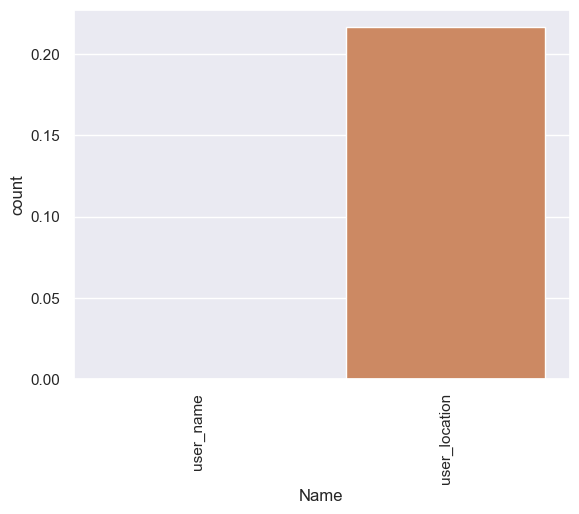

In [10]:
plot_missing_values(twt_data)

<AxesSubplot:>

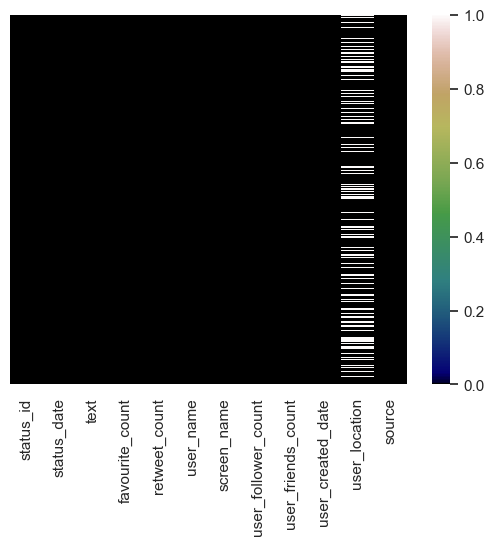

In [11]:
### Heatmap for missing values
sns.heatmap(twt_data.isnull(), cbar=True, yticklabels=False, cmap='gist_earth')

In [12]:
## NOW let us plot the Unique Values

def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

uni_df = return_unique_values(twt_data)
print(uni_df)

               Features  Uniques
0             status_id    81034
1           status_date    76175
2                  text    80408
3       favourite_count      646
4         retweet_count      328
5             user_name    35765
6           screen_name    36636
7   user_follower_count     9892
8    user_friends_count     5131
9     user_created_date    36627
10        user_location    12073
11               source      841


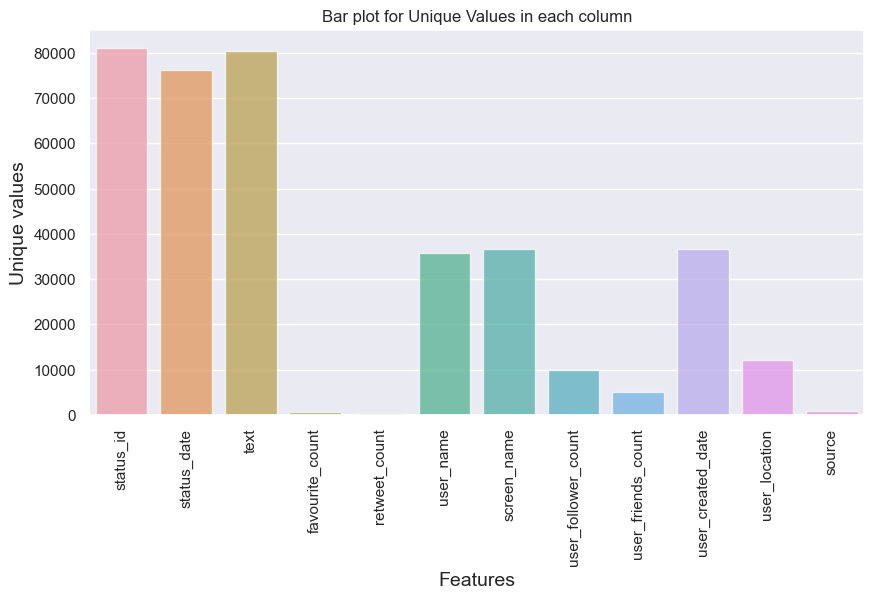

In [13]:
f, ax = plt.subplots(1,1, figsize=(10,5))

sns.barplot(x=uni_df['Features'], y=uni_df['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Frequent users who tweet about that mention virus and the virusShell vulnerability

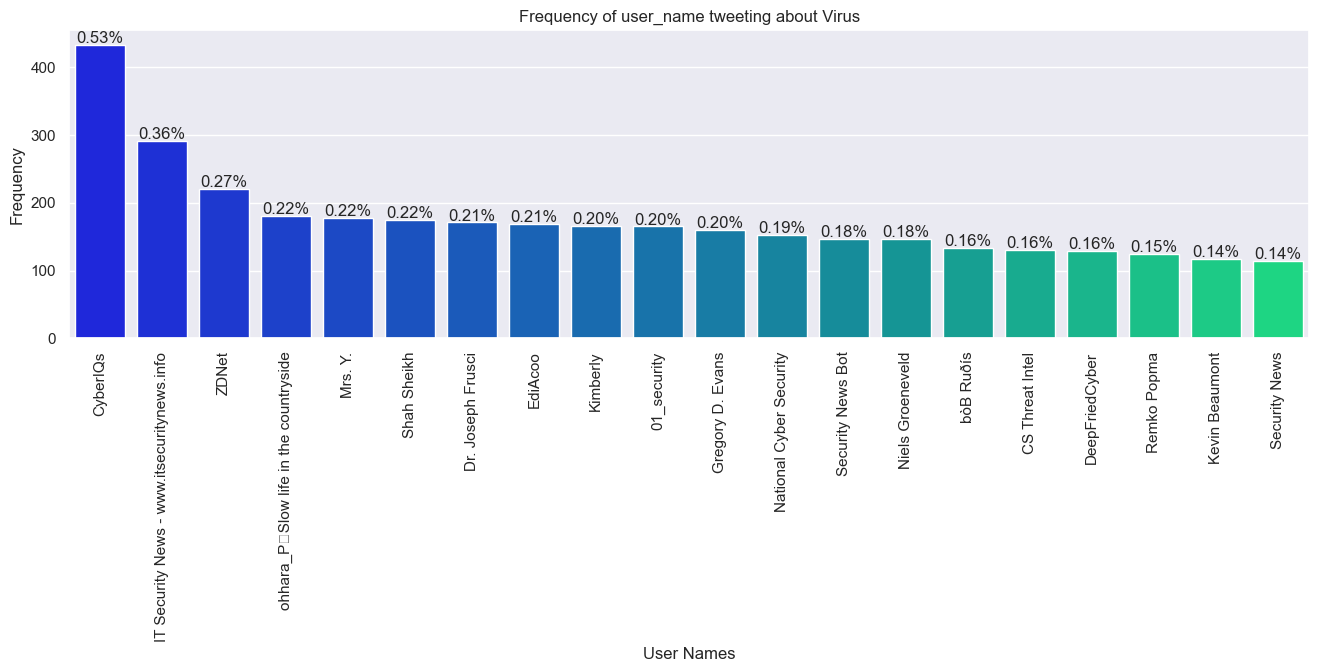

In [14]:
def plot_frequency_charts(twt_data, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = twt_data[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(twt_data))
    g = sns.countplot(twt_data[feature], order = twt_data[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Virus'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    
plot_frequency_charts(twt_data, 'user_name', 'User Names','winter')

# The most used sources for tweeting about Virus vulnerability

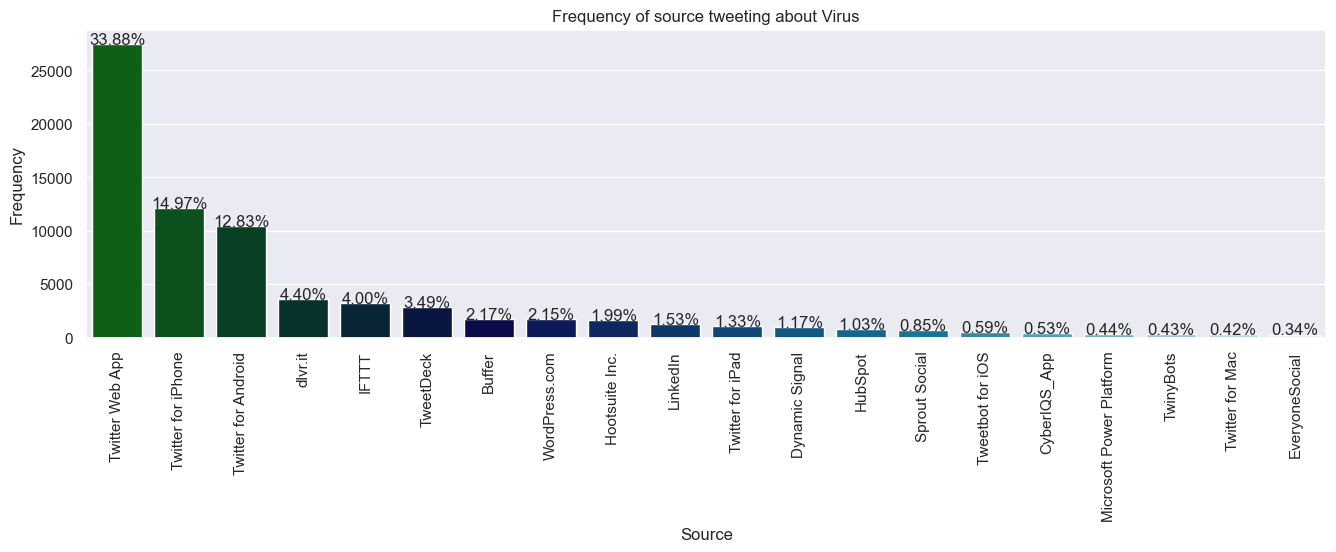

In [15]:
plot_frequency_charts(twt_data, 'source','Source', 'ocean')

# Most Frequent locations from where people tweet about Virus vulnerability

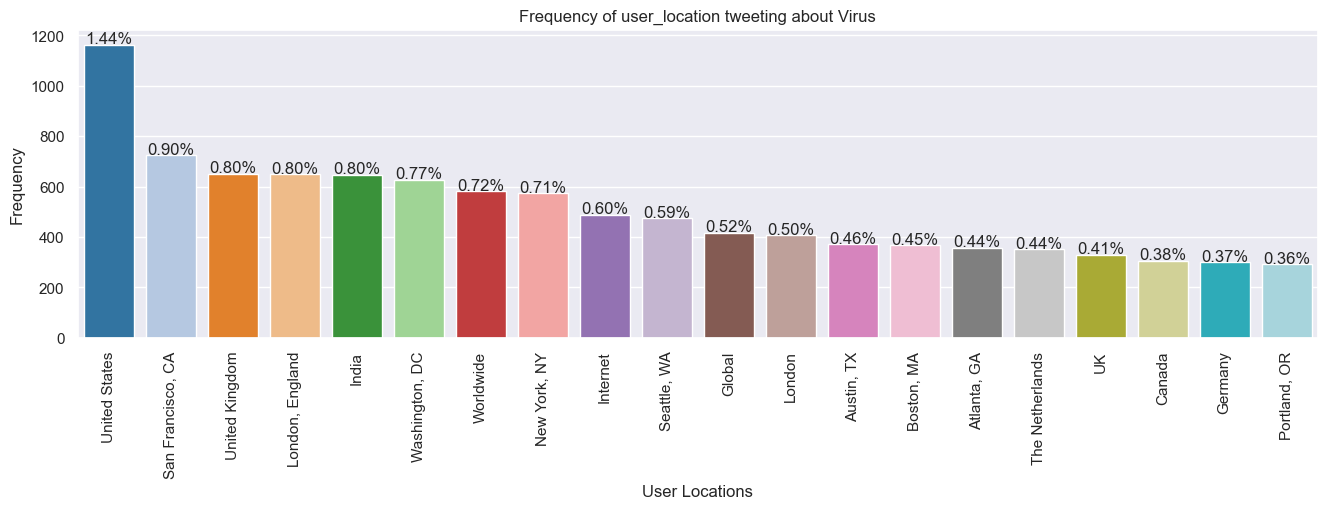

In [16]:
plot_frequency_charts(twt_data, 'user_location', 'User Locations', 'tab20')

# Now let us visualize the top words which have been used by most of the people in tweeting about the VIRUS
Let us first visualize top 30 words used in tweets location wise

In [17]:
# import nltk

In [18]:
# nltk.download('stopwords')

In [19]:
import nltk
# nltk.download('stopwords')

from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'k', 'i', 's', 'h', 'a', 'n']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

["you've", "you'll", "you'd", 'your', 'yours']


In [20]:
# twt_data.head()

In [21]:
from collections import Counter

def draw_bar_graph_for_text_visualization(df, location):
    tweets_from_loc = df.loc[df.user_location==location]
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'Counter'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='Counter', 
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Most Prevelant Words in {}".format(location))
    plt.xticks(rotation='vertical');

In [22]:
from wordcloud import WordCloud, STOPWORDS
def draw_word_cloud(df, location, title):
    loc_df = df.loc[df.user_location==location]
    loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_df['text']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

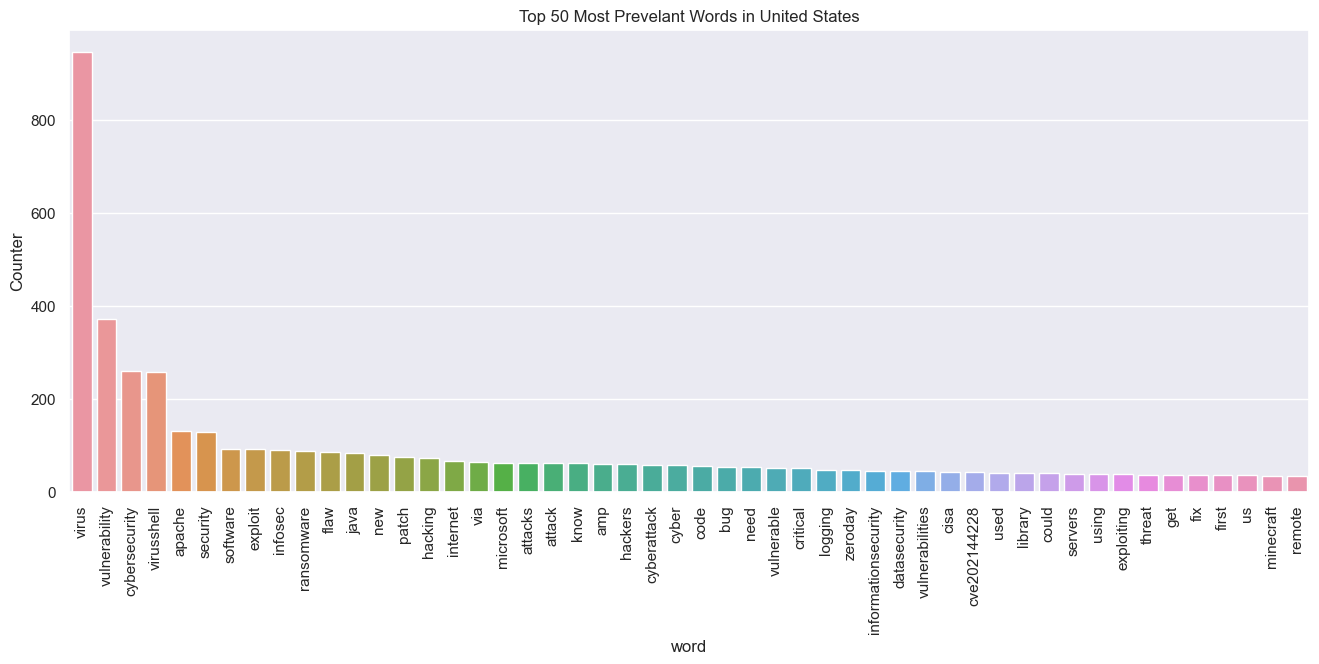

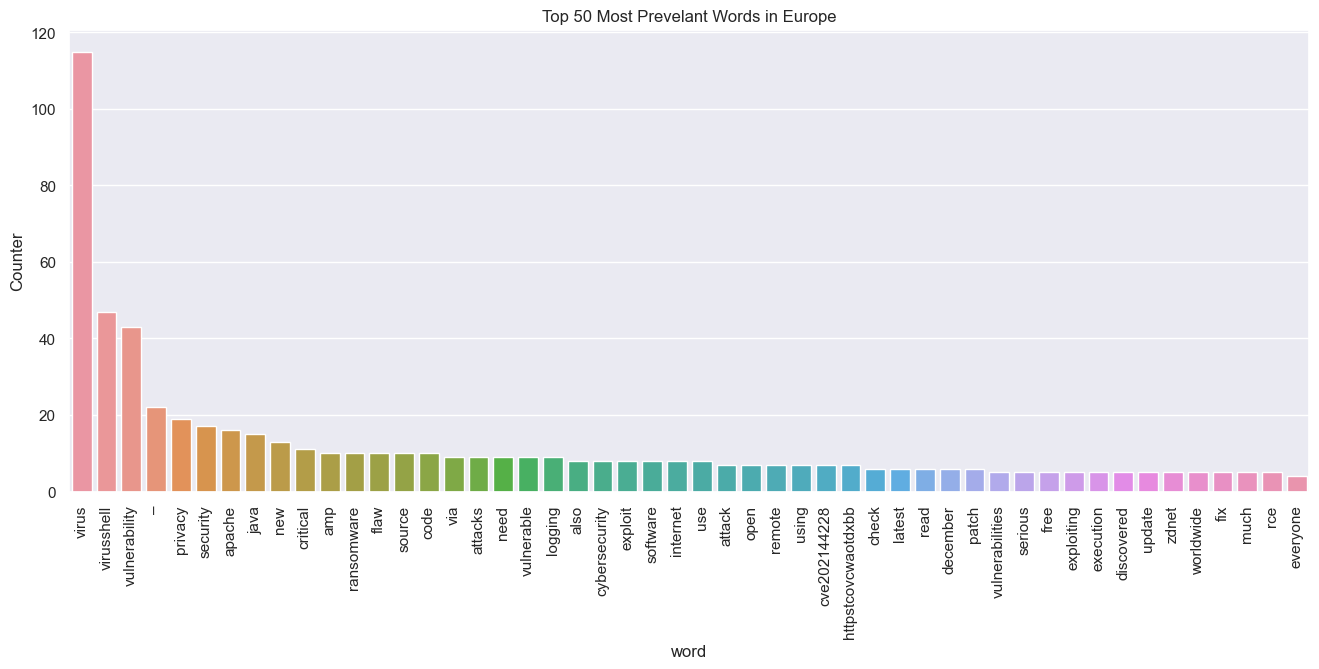

In [23]:
draw_bar_graph_for_text_visualization(twt_data, 'United States')
draw_bar_graph_for_text_visualization(twt_data, 'Europe')

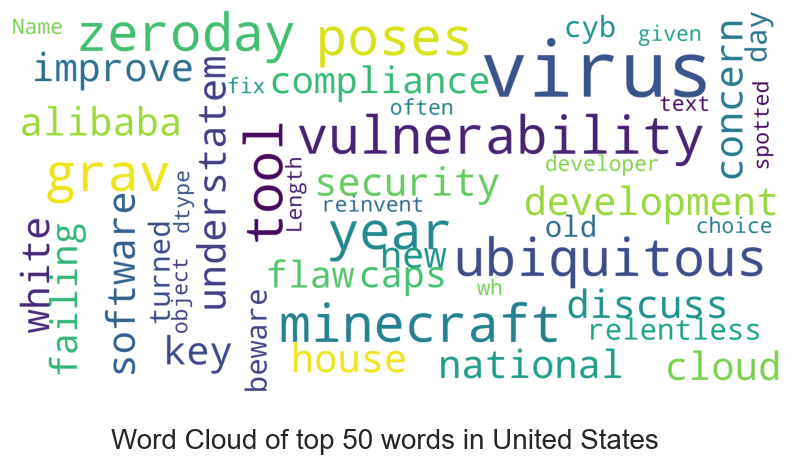

In [24]:
draw_word_cloud(twt_data, 'United States', 'Word Cloud of top 50 words in United States')

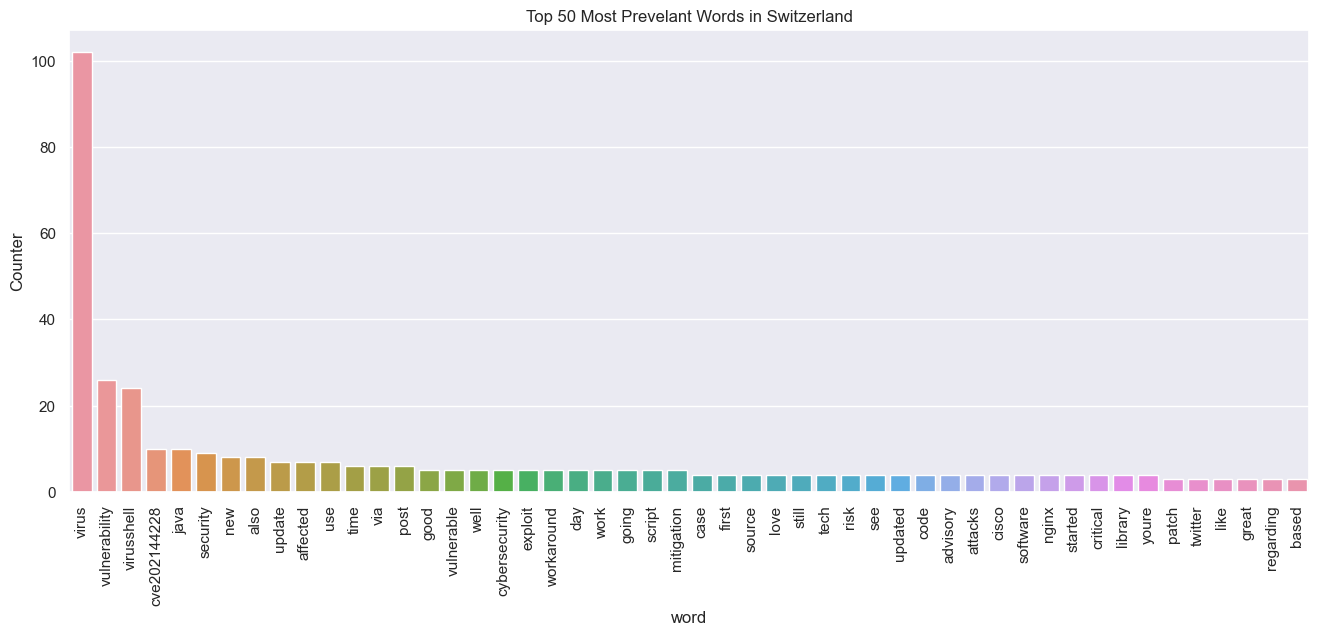

In [25]:
draw_bar_graph_for_text_visualization(twt_data, 'Switzerland')

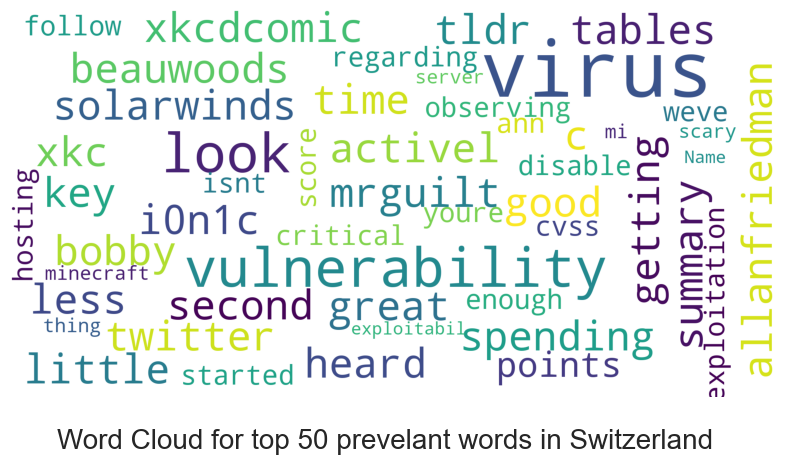

In [26]:
draw_word_cloud(twt_data, 'Switzerland', 'Word Cloud for top 50 prevelant words in Switzerland')

In [27]:
twt_data['status_date'] = pd.to_datetime(twt_data['status_date']) 
twt_data = twt_data.sort_values(['status_date'])
twt_data['day'] = twt_data['status_date'].astype(str).str.split(' ', expand=True)[0]


In [28]:
def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

twt_data['hashtag'] = twt_data['text'].apply(lambda row : split_hashtags(row))
twt_data = twt_data.explode('hashtag')
twt_data['hashtag'] = twt_data['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
twt_data = twt_data[twt_data['hashtag']!='nan']


In [29]:
hashtags = twt_data.groupby(['day', 'hashtag'])['user_name'].count().reset_index()
hashtags.columns = ['day', 'hashtag', 'count']

In [30]:
import plotly.express as px

def plot_hashtags_by_day(data, hashtag):
    data = data[data['hashtag']==hashtag]
    fig = px.line(data, x='day', y='count', orientation='v', title='Dynamic of hashtag "' + hashtag + '"' , width=800)
    fig.show()

In [31]:
plot_hashtags_by_day(hashtags, 'virus')

In [32]:
from iso3166 import countries

hashtags_country = twt_data.groupby(['day', 'hashtag', 'user_location'])['user_name'].count().reset_index()
hashtags_country.columns = ['day', 'hashtag', 'location', 'count']

hashtags_country['location'] = hashtags_country['location'].str.split(',', expand=True)[1].str.lstrip().str.rstrip()

country_dict = {}
for c in countries:
    country_dict[c.name] = c.alpha3
    
hashtags_country['alpha3'] = hashtags_country['location']
hashtags_country = hashtags_country.replace({"alpha3": country_dict})

country_list = ['England', 'United States', 'United Kingdom', 'London', 'UK']

hashtags_country = hashtags_country[
    (hashtags_country['alpha3'] == 'USA') | 
    (hashtags_country['location'].isin(country_list)) | 
    (hashtags_country['location'] != hashtags_country['alpha3'])
]

gbr = ['England', 'United Kingdom', 'London', 'UK']
us = ['United States', 'NY', 'CA', 'GA']

hashtags_country = hashtags_country[hashtags_country['location'].notnull()]
hashtags_country.loc[hashtags_country['location'].isin(gbr), 'alpha3'] = 'GBR'
hashtags_country.loc[hashtags_country['location'].isin(us), 'alpha3'] = 'USA'

hashtags_country.loc[hashtags_country['alpha3'] == 'USA', 'location'] = 'USA'
hashtags_country.loc[hashtags_country['alpha3'] == 'GBR', 'location'] = 'United Kingdom'
hashtags_country = hashtags_country.groupby(['day', 'hashtag', 'location', 'alpha3'])['count'].sum().reset_index()
hashtags_country

day                                            hashtag  \
0      2021-12-09                      (1/5)ifyoureusingviruslibrary   
1      2021-12-09                                    (2/5)firstofall   
2      2021-12-09  (4/5)why?ingeneralitsquiteknownprobleminjndiec...   
3      2021-12-09  butvirusdidntprovideanyfiltertoexcludeunknowna...   
4      2021-12-09  ithasbeenfixedlike5daysago.thefixisavailablesi...   
...           ...                                                ...   
16622  2021-12-24  youcanupdateviruswithoutupdatingthedependency....   
16623  2021-12-24                                          youknow!💤   
16624  2021-12-24  ⁦@dhsgov⁩hasannouncedthatthe#hackdhsprogramisn...   
16625  2021-12-24  ⁦@nvidia⁩andhewlettpackardenterprise(⁦@hpe⁩)ha...   
16626  2021-12-24  📢don’tleaveyourselfopentocybercrimetheseholida...   

             location alpha3  count  
0              Poland    POL      1  
1              Poland    POL      1  
2              Poland    POL      1  
3              Poland    POL      1  
4              Poland    POL      1  
...               ...    ...    ...  
16622       Argentina    ARG      1  
16623  United Kingdom    GBR      1  
16624           India    IND      1  
16625           India    IND      1  
16626       Australia    AUS      1  

[16627 rows x 5 columns]

Top 20 most unique words used from the dataset 

         Word  Frequency
          the      97201
           to      79928
        VIRUS      64602
          and      53784
            a      50101
           of      46227
           is      40755
           in      35797
          for      31437
       #VIRUS      25801
           on      23980
         that      21651
          you      21647
         this      18579
vulnerability      18279
            I      17977
           it      17606
          are      16990
         with      16021
           be      13792




<AxesSubplot:title={'center':'Top 20 most unique words used'}, ylabel='Frequency'>

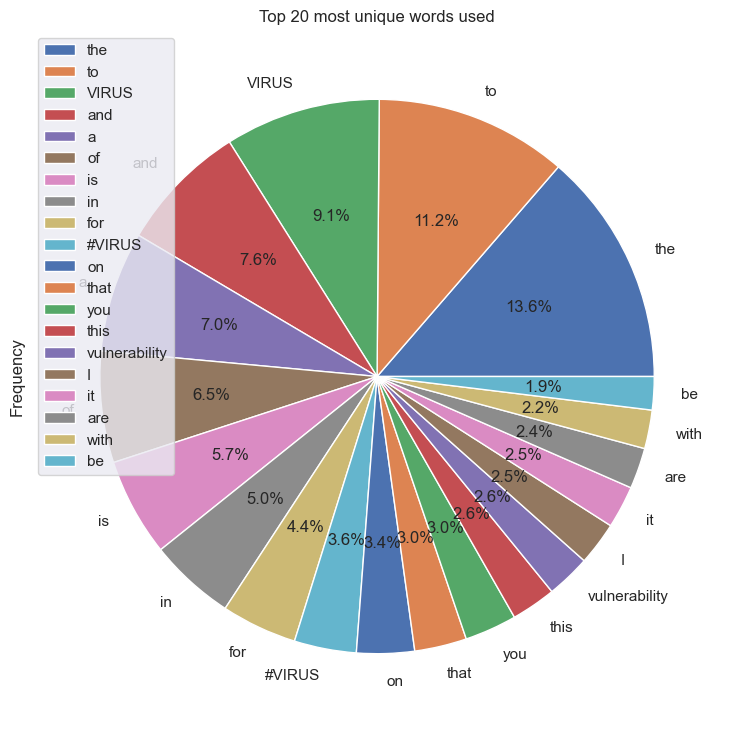

In [33]:
no_top_unique_words = "20" #@param {type:"string"}


result = Counter(" ".join(twt_data['text'].values.tolist()).split(" ")).items()
df2 = pd.DataFrame(result)
df2.columns =['Word', 'Frequency']
df2 = df2[df2.Word != ""] #Deletes the empty spaces counted
df2 = df2.sort_values(['Frequency'], ascending=[False]) #Sort dataframe by frequency (Descending)

print('\033[1mTop '+no_top_unique_words+' most unique words used from the dataset\033[0m \n')
print(df2.head(int(no_top_unique_words)).to_string(index=False)) #Prints the top N unique words used
print("\n")
df3 = df2.head(int(no_top_unique_words))
df3.plot(y='Frequency', kind='pie', labels=df3['Word'], figsize=(9, 9), autopct='%1.1f%%', title='Top '+no_top_unique_words+' most unique words used')

In [34]:
def plot_hashtag_map(data, hashtag):
    data = data[data['hashtag']==hashtag]
    fig = px.choropleth(
        data, 
        locations="alpha3",
        hover_name="hashtag",
        color="count",
        animation_frame="day",
        projection="natural earth",
        color_continuous_scale=px.colors.sequential.Plasma,
        title='Dynamic of hashtag "' + hashtag + '"' ,
        width=800, 
        height=600
    )
    fig.show()
    
plot_hashtag_map(hashtags_country, 'virus')

# RQ1: How is the correlation between retweets and favorites? Was this expected? Is this related to this dataset?

In [35]:
# distribution of favorite counts
twt_data.favourite_count.describe()

count    127684.000000
mean         12.099590
std         147.497037
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max       13605.000000
Name: favourite_count, dtype: float64

In [36]:
# distribution of retweet counts
twt_data.retweet_count.describe()

count    127684.000000
mean          3.443446
std          38.790481
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        2434.000000
Name: retweet_count, dtype: float64

The quantitative analysis above showed a right-skewed distribution for both variables in which the median lies to the left of the mean. Considering the potential application of the counts of favorite and retweet for understanding the popularity of the corresponding Tweet, the distributions of these two variables must be right-skewed; in other words, large numbers of favorite counts and retweet counts are less likely to be observed than smaller numbers. If the distributions of both the favorite counts and the retweet counts are right-skewed, then what are the direction and the magnitude of the correlation between these two variables?

To streamline the visualization of the correlation between the favorite counts and the retweet counts, a sub-dataset containing only these two variables from the dataframe object twt_data was newly created. In addition to creating a scatter plot for retweet counts vs. favorite counts, the value of the correlation coefficient for these two variables was calculated and displayed in the plot.

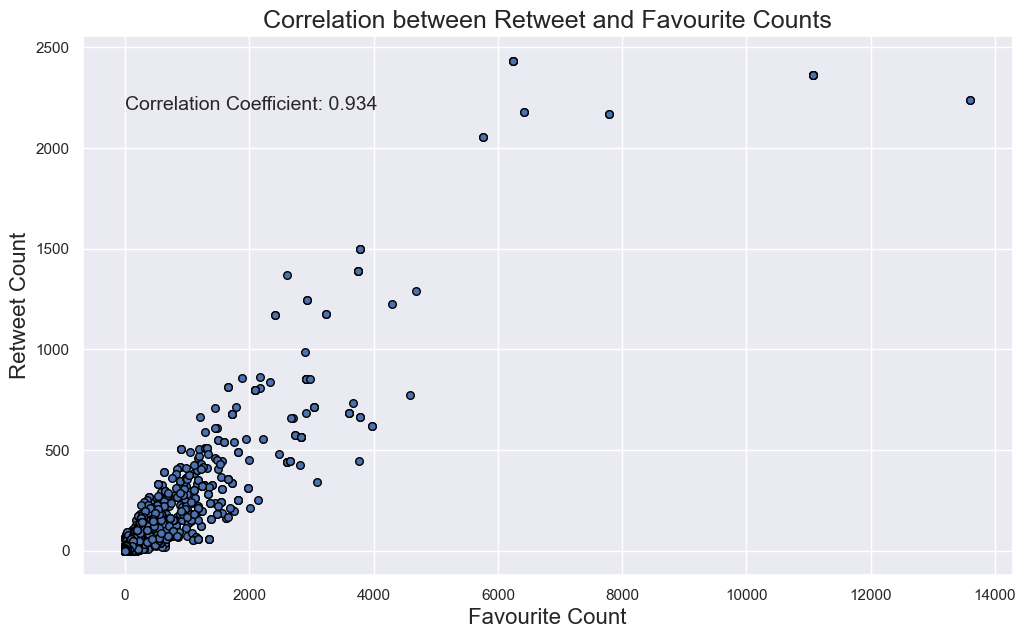

In [37]:
# sub-dataset for only the two columns favorite_count and retweet_count
df_2 = twt_data[['favourite_count', 'retweet_count']]
df_2.reset_index(drop = True, inplace = True)

# configure plot with size, title, and labels for both axes
plt.figure(figsize = (12, 7))
plt.title('Correlation between Retweet and Favourite Counts', fontsize = 18)
plt.xlabel('Favourite Count', fontsize = 16)
plt.ylabel('Retweet Count', fontsize = 16)

# scatter plot of retweet count vs. favorite count
plt.scatter(x = df_2.favourite_count, y = df_2.retweet_count
            , s = 30, c = 'b', marker = 'o', edgecolors = 'black')

# compute and display correlation coefficient
corr = np.corrcoef(x = df_2.favourite_count, y = df_2.retweet_count)[0, 1]
plt.text(x = df_2.favourite_count.min(), y = df_2.retweet_count.max() * 0.9
         , s = 'Correlation Coefficient: {}'.format(round(corr, 3))
         , fontsize = 14);

In [38]:
import statsmodels.api as sm
# add a new column for y-intercept
df_2 = df_2.copy()
df_2['intercept'] = 1

# OLS
lm = sm.OLS(df_2['retweet_count'], df_2[['intercept', 'favourite_count']]) # linear modeling with OLS: y-var, x-var
results = lm.fit() # apply the best fit
results.summary() # summary of linear modeling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 8.776e+05
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:27:15   Log-Likelihood:            -5.1653e+05
No. Observations:              127684   AIC:                         1.033e+06
Df Residuals:                  127682   BIC:                         1.033e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           0.4703      0.039     12.115      0.000       0.394       0.546
favourite_count     0.2457      0.000    936.804      0.000       0.245       0.246
==============================================================================
Omnibus:                   213602.670   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      15904385817.331
Skew:                           9.781   Prob(JB):                         0.00
Kurtosis:                    1731.893   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value of 0.873 obtained from this linear regression also indicated a strong correlation between the predictor and the response variables in that according to this value, changes in favorite counts account for 87.3% of the variability in retweet counts.

The values of the slope and the y-intercept obtained from applying the linear regression were used to build the following linear model.

y = 0.2457x + 0.4703

The linear fit was added to the scatter plot of retweet counts vs. favorite counts as shown below. Although having more pairs of favorite counts and retweet counts above the center of the distribution of each variable would help build a linear model of greater accuracy, precision, and confidence for larger numbers of favorite and retweet counts, the results from the linear regression support the observations from the scatter plot: favorite counts and retweet counts show a strong, positive relationship.

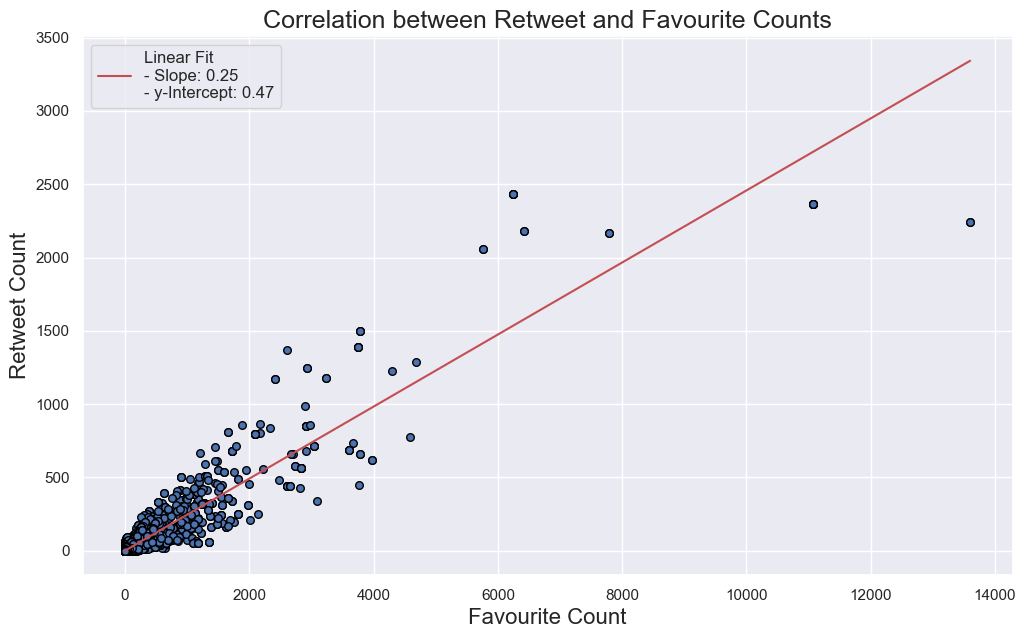

In [39]:
# configure plot with size, title, and labels for both axes
plt.figure(figsize = (12, 7))
plt.title('Correlation between Retweet and Favourite Counts', fontsize = 18)
plt.xlabel('Favourite Count', fontsize = 16)
plt.ylabel('Retweet Count', fontsize = 16)

# scatter plot of retweet count vs. favorite count
plt.scatter(x = df_2.favourite_count, y = df_2.retweet_count
            , s = 30, c = 'b', marker = 'o', edgecolors = 'black')

# configure and plot linear fit
slope = 0.2457
intercept = 0.4703
x_ = np.arange(df_2.favourite_count.min(), df_2.favourite_count.max(), 10)

# plot and add legend for the linear fit
linear_fit = plt.plot(x_, x_*slope + intercept, linewidth = 1.5, c = 'r')
plt.legend(handles = linear_fit
           , labels = ['Linear Fit\n- Slope: {}\n- y-Intercept: {}'.format(round(slope,2), round(intercept,2))]
           , fontsize = 12);

# RQ2: Can we observe different clusters of users based on their characteristics and/or sharing activities? 

# Popularity Analysis

In [40]:
from scipy.stats.stats import pearsonr

In [41]:
df_filtered = twt_data


In [42]:
df_filtered.shape

(127684, 14)

Raw Retweet and Raw Favorite Count

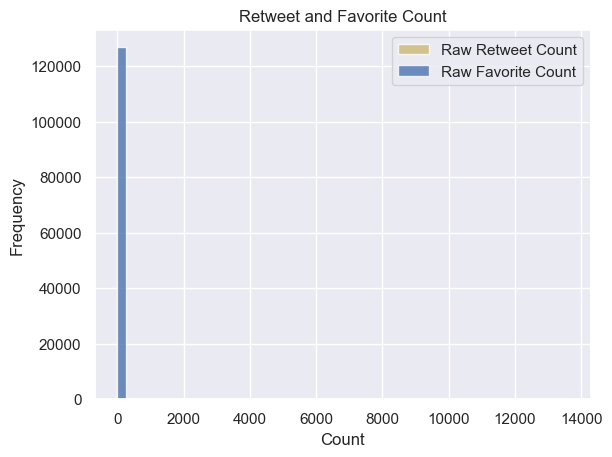

In [43]:
raw_retweet=np.array(df_filtered.retweet_count)
raw_favourite=np.array(df_filtered.favourite_count)
plt.figure()
plt.hist(raw_retweet, alpha=.8, color='y', bins=50, label="Raw Retweet Count")
plt.hist(raw_favourite, alpha=.8, bins=50, label="Raw Favorite Count")
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Retweet and Favorite Count')
plt.legend()
plt.show()

Raw Popularity Score

In [44]:
popularity = [retweets + favs for retweets, favs in zip(twt_data.retweet_count, twt_data.favourite_count)]

In [45]:
twt_data.loc[:,'popularity']=popularity 
twt_data.shape

dftouse = twt_data.reset_index()

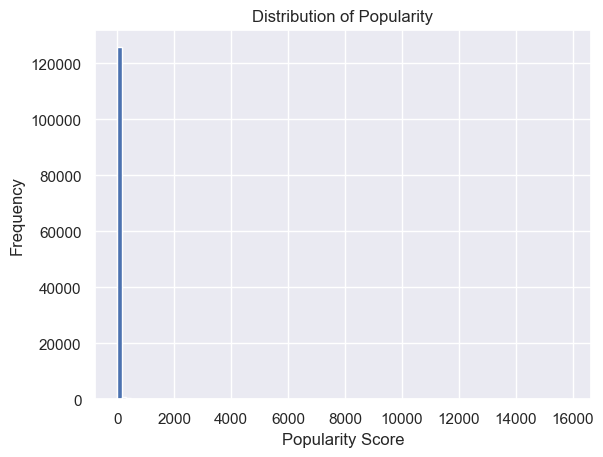

In [46]:
plt.hist(dftouse['popularity'],bins=100)
plt.title("Distribution of Popularity")
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

In [47]:
dftouse = twt_data.reset_index()

In [48]:
dftouse['popularity'].describe()

count    127684.000000
mean         15.543036
std         184.259820
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max       15846.000000
Name: popularity, dtype: float64

In [49]:
zlogpopularity = [retweets + favs for retweets, favs in zip(dftouse.retweet_count, dftouse.favourite_count)]
dftouse.loc[:,'logpopularity']=zlogpopularity

In [50]:
dftouse['logpopularity'].describe()

count    127684.000000
mean         15.543036
std         184.259820
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max       15846.000000
Name: logpopularity, dtype: float64

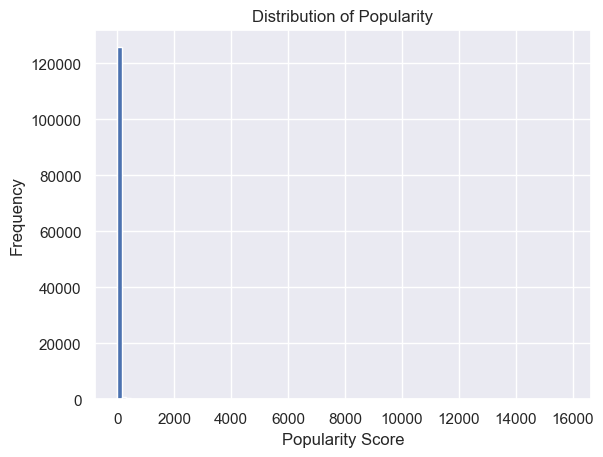

In [51]:
plt.hist(dftouse['popularity'],bins=100)
plt.title("Distribution of Popularity")
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

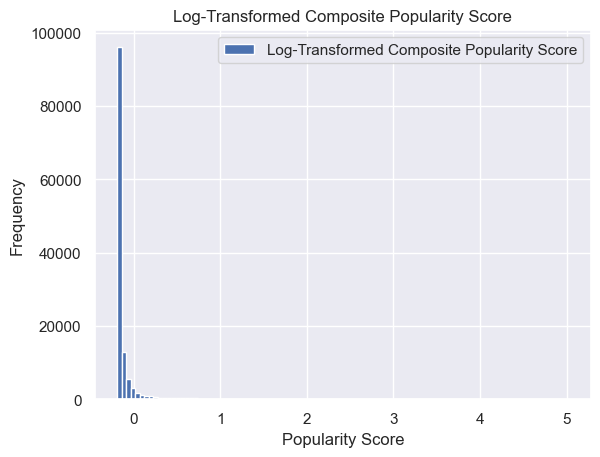

In [52]:
retweet_mean = np.mean(raw_retweet)
retweet_std = np.std(raw_retweet)
z_retweets = [(retweet_count - retweet_mean)/float(retweet_std) for retweet_count in raw_retweet]
dftouse['z_retweets']=z_retweets 

favorite_mean = np.mean(raw_favourite)
favorite_std = np.std(raw_favourite)
z_favorites = [(favorite_count - favorite_mean)/float(favorite_std) for favorite_count in raw_favourite]
dftouse['z_favorites']=z_favorites

z_popularity = [retweets + favs for retweets, favs in zip(z_retweets, z_favorites)]
dftouse['z_popularity']=z_popularity

plt.figure()
plt.hist(np.log1p(dftouse['z_popularity']), bins=100, label="Log-Transformed Composite Popularity Score")
plt.legend()
plt.title('Log-Transformed Composite Popularity Score')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

In [53]:
dftouse['log_retweet_count']=np.log(raw_retweet)

In [54]:
dftouse['log_retweet_count'].describe()

count    1.276840e+05
mean             -inf
std               NaN
min              -inf
25%               NaN
50%               NaN
75%      0.000000e+00
max      7.797291e+00
Name: log_retweet_count, dtype: float64

In [55]:
retweet_stats = dftouse['log_retweet_count'].describe()
retweet_mean = retweet_stats[1]
retweet_std = retweet_stats[2]

Transforming Favorites

In [56]:
dftouse['log_favorite_count']=np.log1p(dftouse['favourite_count'])

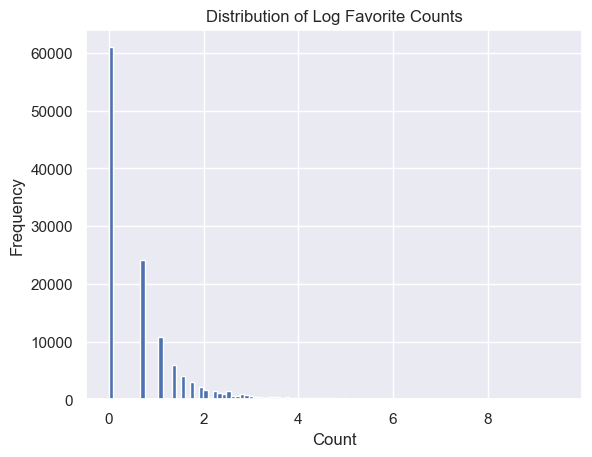

In [57]:
plt.hist(dftouse['log_favorite_count'],bins=100)
plt.title("Distribution of Log Favorite Counts")
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [58]:
dftouse['log_favorite_count'].describe()

count    127684.000000
mean          0.839562
std           1.168928
min           0.000000
25%           0.000000
50%           0.693147
75%           1.098612
max           9.518266
Name: log_favorite_count, dtype: float64

In [59]:
favorite_stats = dftouse['log_favorite_count'].describe()
favorite_mean = favorite_stats[1]
favorite_std = favorite_stats[2]

In [60]:
retweets = [(retweet_count - retweet_mean)/float(retweet_std) for retweet_count in dftouse['log_retweet_count']]

In [61]:
favorites = [(favorite_count - favorite_mean)/float(favorite_std) for favorite_count in dftouse['log_favorite_count']]

In [62]:
dftouse.loc[:,'retweet_count']=retweets

In [63]:
dftouse.loc[:,'favorite_count']=favorites

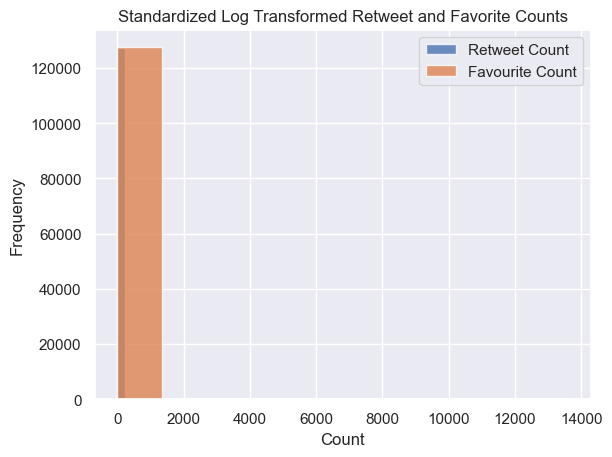

In [64]:
plt.figure()
plt.hist(twt_data.retweet_count, alpha=.8, label="Retweet Count")
plt.hist(twt_data.favourite_count, alpha=.8, label="Favourite Count")
plt.legend()
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Standardized Log Transformed Retweet and Favorite Counts')
plt.show()

In [65]:
print (dftouse.favorite_count.describe())

count    1.276840e+05
mean     2.959903e-13
std      1.000000e+00
min     -7.182328e-01
25%     -7.182328e-01
50%     -1.252560e-01
75%      2.216131e-01
max      7.424497e+00
Name: favorite_count, dtype: float64


In [66]:
print (twt_data.retweet_count.describe())

count    127684.000000
mean          3.443446
std          38.790481
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        2434.000000
Name: retweet_count, dtype: float64


In [67]:
zlogpopularity = [retweets + favs for retweets, favs in zip(dftouse.retweet_count, dftouse.favorite_count)]
dftouse.loc[:,'logpopularity']=zlogpopularity

In [68]:
dftouse['logpopularity'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: logpopularity, dtype: float64

# Correlation between length of tweet and popularity

In [69]:
from scipy.stats import pearsonr

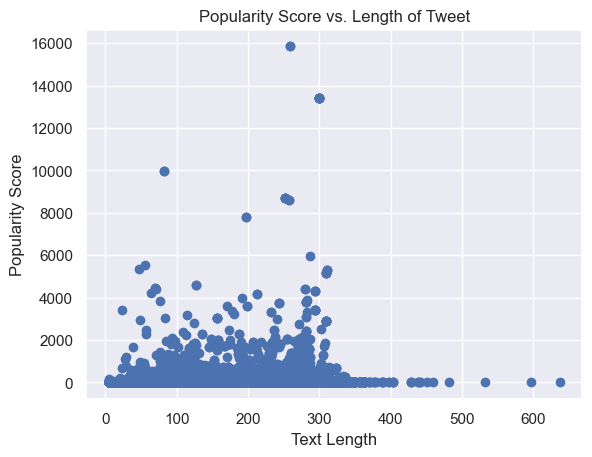

In [70]:
tweet_len = [len(text) for text in twt_data['text']]
# print (pearsonr(tweet_len,dftouse['logpopularity']))
plt.scatter(tweet_len,dftouse['popularity'])
plt.title('Popularity Score vs. Length of Tweet')
plt.ylabel('Popularity Score')
plt.xlabel('Text Length')
plt.figsize=(200,10)
plt.show()

# Location

In [71]:
totaltweets = float(len(twt_data['user_location'])) # total number of tweets in sample
countryfrac = float(sum(map(lambda r: int(isinstance(r, str)), twt_data['user_location'])))/totaltweets
print (countryfrac)

0.7845227279847122


In [72]:
from datetime import datetime
date_objects = [datetime.strptime(str(each), '%Y-%m-%d %H:%M:%S') for each in twt_data['status_date']]

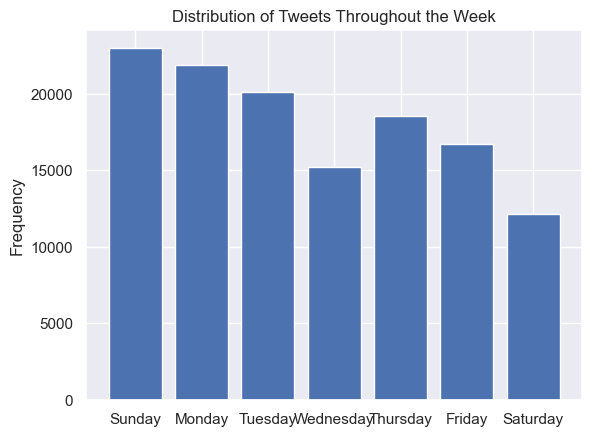

In [73]:
day_objects = [each.weekday() for each in date_objects]
x_pos = Counter(day_objects).keys()
x_pos_x=range(0,7)
height = Counter(day_objects).values()
days = ('Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
plt.bar(x_pos,height,align='center')
plt.xticks(x_pos_x, days)
plt.ylabel("Frequency")
plt.title("Distribution of Tweets Throughout the Week")
plt.show() 

When are tweets posted during the day?

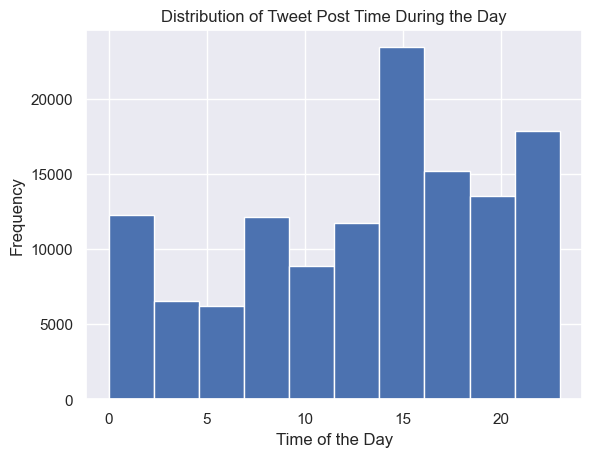

In [74]:
hour_objects = [each.hour for each in date_objects]
plt.hist(hour_objects)
plt.title("Distribution of Tweet Post Time During the Day")
plt.xlabel('Time of the Day')
plt.ylabel('Frequency')
plt.show()

A histogram is helpful, but a polar histogram could possibly visualize our data in a more intuitive way.

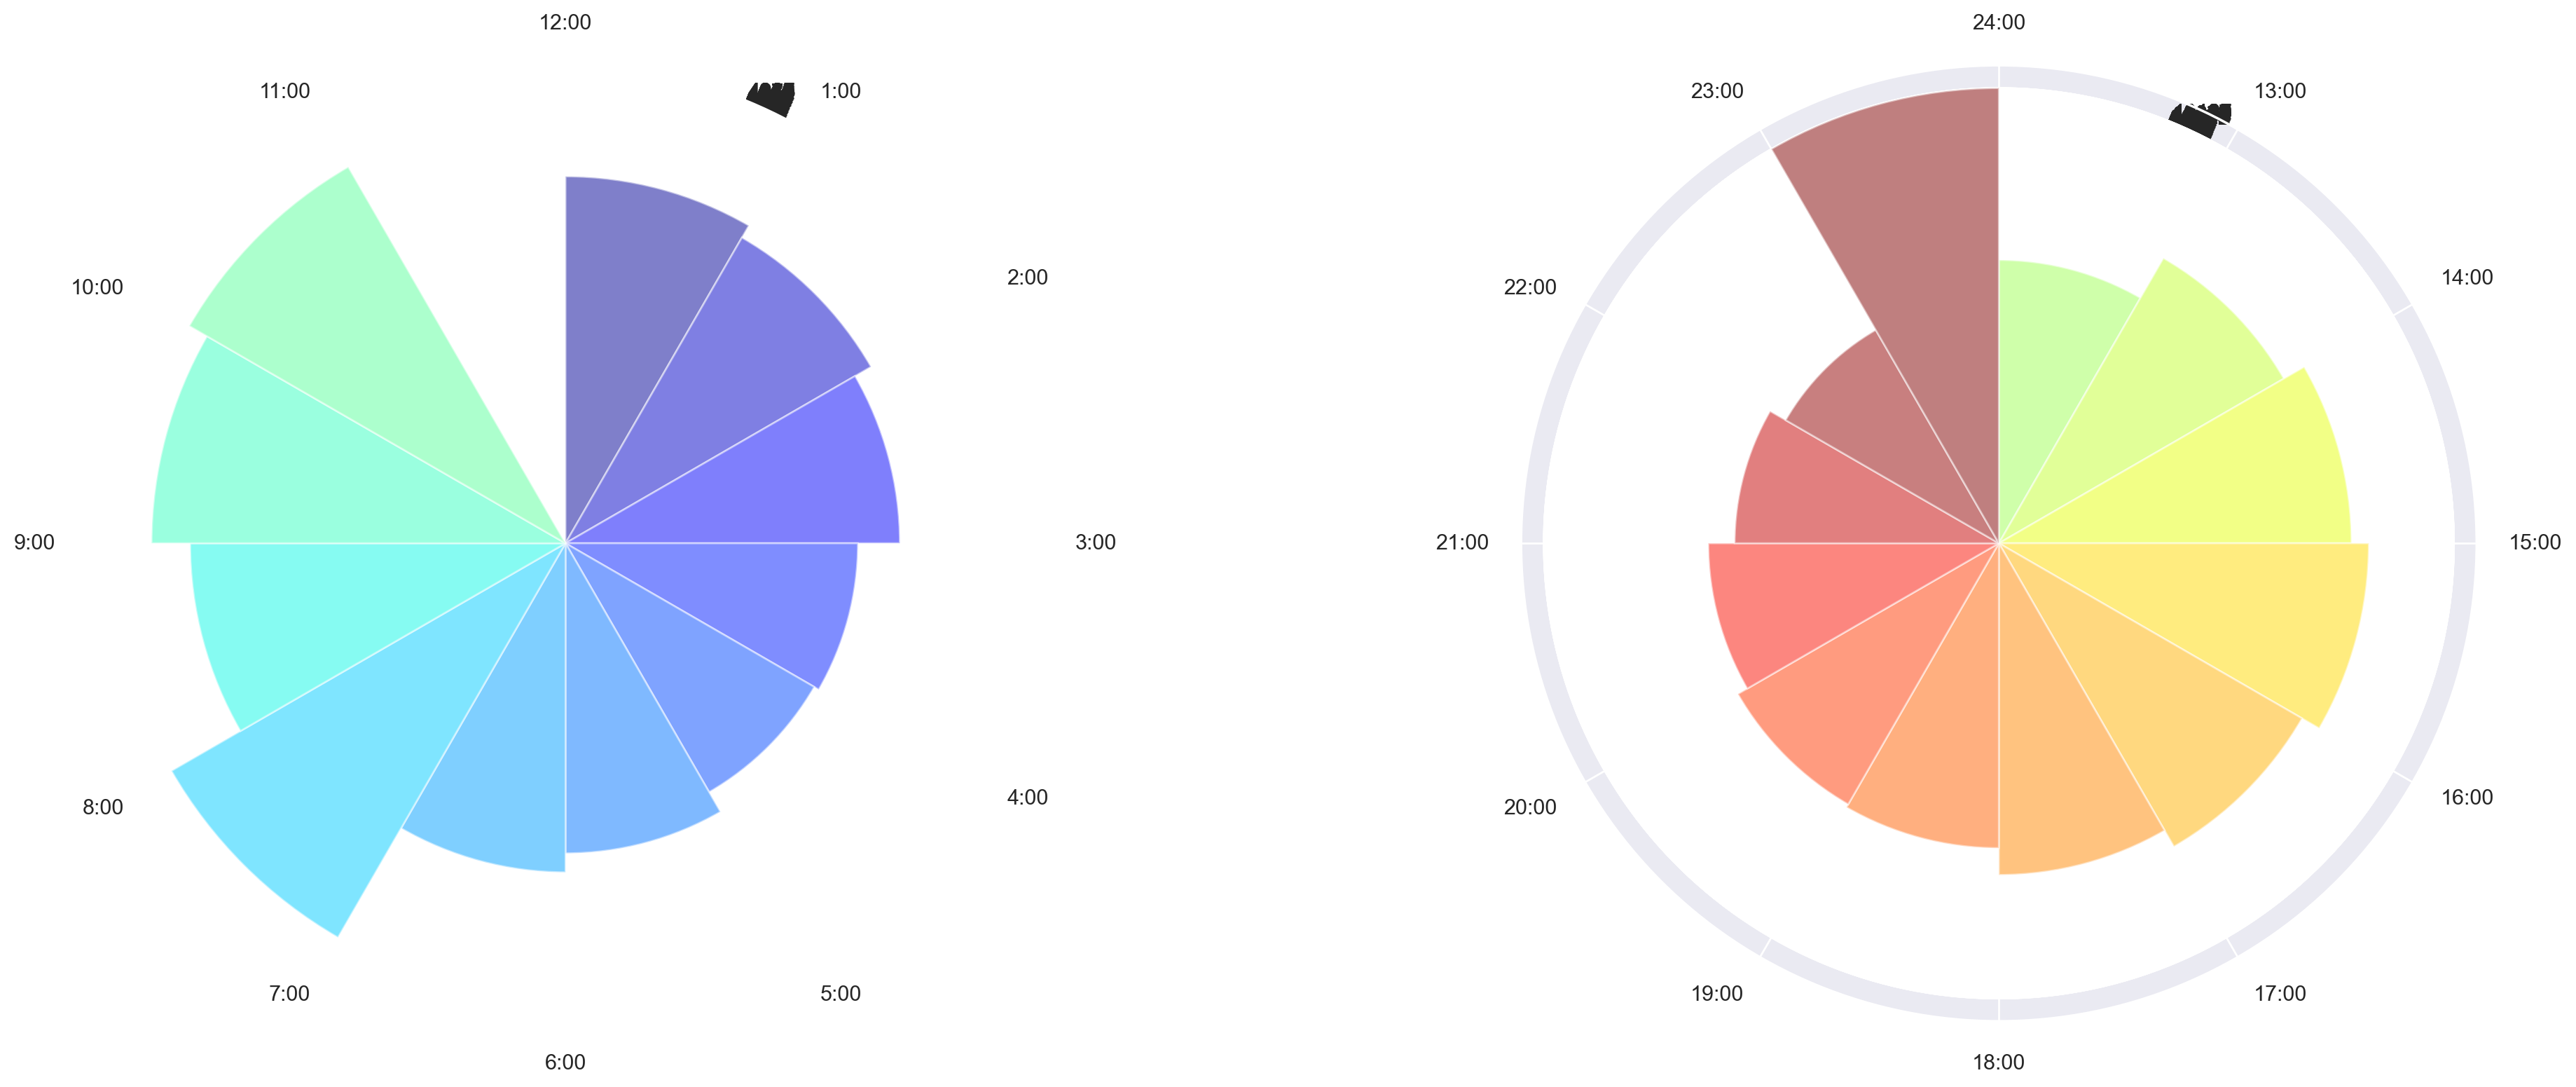

In [75]:
import matplotlib.ticker as tkr

def main():
    data = hour_objects
    axes = plot_clock(data)
    for ax in axes:
        realign_polar_xticks(ax)
    plt.show()

def realign_polar_xticks(ax):
    pass
    for theta, label in zip(ax.get_xticks(), ax.get_xticklabels()):
        theta = theta * ax.get_theta_direction() + ax.get_theta_offset()
        theta = np.pi/2 - theta
        y, x = np.cos(theta), np.sin(theta)
        if x >= 0.1:
            label.set_horizontalalignment('left')
        if x <= -0.1:
            label.set_horizontalalignment('right')
        if y >= 0.5:
            label.set_verticalalignment('bottom')
        if y <= -0.5:
            label.set_verticalalignment('top')

def plot_clock(data):
    def hour_formatAM(x, p):
        hour = x * 6 / np.pi
        return '{:0.0f}:00'.format(hour) if x > 0 else '12:00'

    def hour_formatPM(x, p):
        hour = x * 6 / np.pi
        return '{:0.0f}:00'.format(hour + 12) if x > 0 else '24:00'

    def plot(ax, theta, counts, formatter):
        colors = plt.cm.jet(theta / 12.0)
        ax.bar(theta, counts, width=np.pi/6, color=colors, alpha=0.5)
        ax.xaxis.set_major_formatter(tkr.FuncFormatter(formatter))

    plt.rcParams['font.size'] = 8

    bins = np.r_[0, 0.5:12, 12, 12.5:24,  23.99999]
    counts = np.histogram(data,bins)[0]

    counts[13] += counts[0]
    counts[-1] += counts[13]

    fig, axes = plt.subplots(ncols=2, figsize=(22, 12), dpi=200,
                             subplot_kw=dict(projection='polar'))
    fig.subplots_adjust(wspace=0.5)

    for ax in axes:
        ax.set(theta_offset=np.pi/2, theta_direction=-1,
               xticks=np.arange(0, np.pi*2, np.pi/6),
               yticks=np.arange(1, counts.max()))

    plot(axes[0], bins[1:13] * np.pi / 6, counts[1:13], hour_formatAM)
    plot(axes[1], bins[14:26] * np.pi / 6, counts[14:26], hour_formatPM)
    return axes

main()

# Correlation between time of day and tweet popularity

There does not appear to be a clear relationship between the time of day that a tweet is created and its popularity score. There does appear to be some cyclical change, but it's hard to tell based on the correlation.

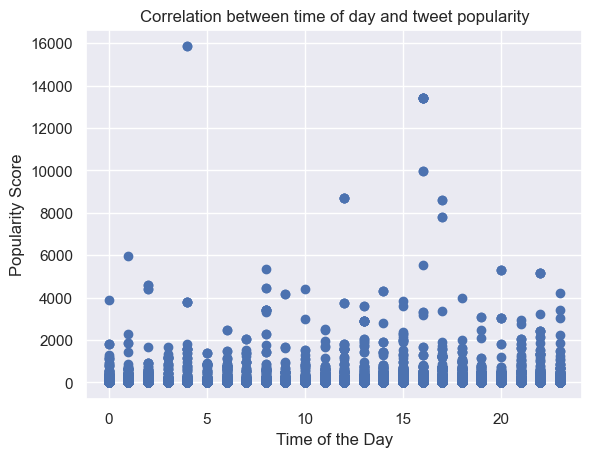

In [76]:
plt.scatter(hour_objects, dftouse['popularity'])
plt.title("Correlation between time of day and tweet popularity")
plt.xlabel('Time of the Day')
plt.ylabel('Popularity Score')
plt.show()

In [77]:
# convert hour ints to strings to make the model evaluate hours as categorical variables 
string_hours = [str(hour) for hour in hour_objects]
dftouse['hour_posted']=string_hours

Correlation between day of the week posted and popularity

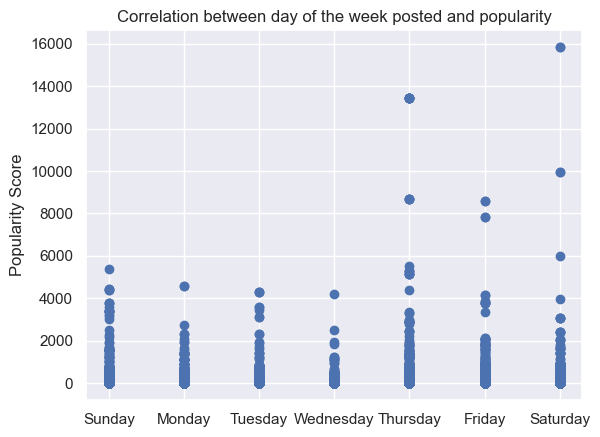

In [78]:
plt.scatter(day_objects, dftouse['popularity'])
x_pos_x=range(0,7)
plt.xticks(x_pos_x, days)
plt.title("Correlation between day of the week posted and popularity")
plt.ylabel('Popularity Score')
plt.show()

The distribution of retweets and favorites over time


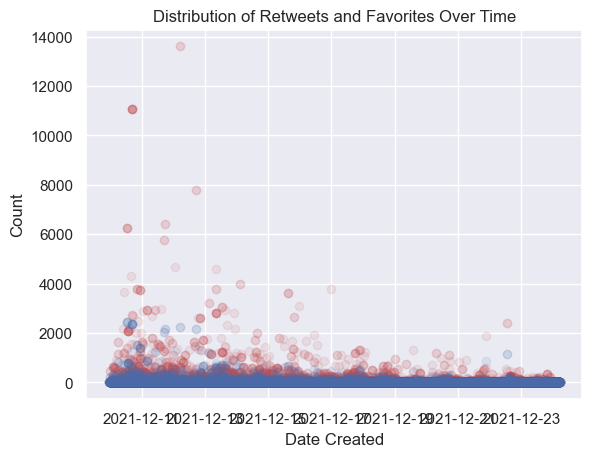

In [79]:
plt.figure()
plt.plot_date(date_objects, raw_favourite, alpha=.1, color='r')
plt.plot_date(date_objects, raw_retweet, alpha=.1, color='b')
plt.ylabel('Count')
plt.xlabel('Date Created')
plt.title('Distribution of Retweets and Favorites Over Time')
plt.show()

User's followers correlated with popularity

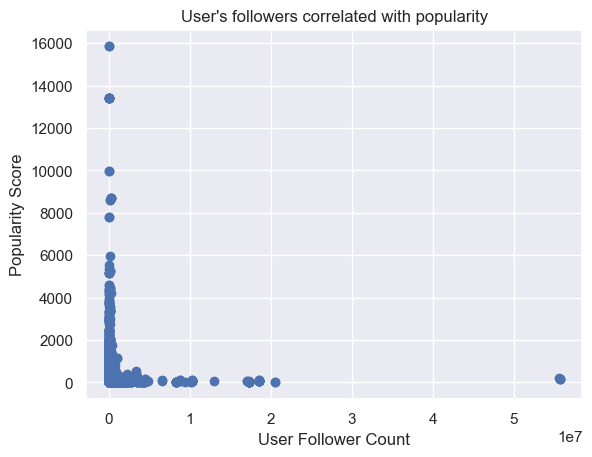

In [80]:
user_follower_count = dftouse['user_follower_count'] 
plt.scatter(user_follower_count,dftouse['popularity'])
plt.ylabel('Popularity Score')
plt.xlabel('User Follower Count')
plt.title("User's followers correlated with popularity")
plt.show()

# RQ3: Can we use machine learning approaches to predict the number of likes/retweets/followers based on users characteristics and shared content? Be creative both in the machine learning pipeline and, in particular, in the feature extraction (HINT: you can use NLP, network science, statistical techniques, etc

In [81]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [82]:
twt_data.columns

Index(['status_id', 'status_date', 'text', 'favourite_count', 'retweet_count',
       'user_name', 'screen_name', 'user_follower_count', 'user_friends_count',
       'user_created_date', 'user_location', 'source', 'day', 'hashtag',
       'popularity'],
      dtype='object')

In [83]:
text_df = twt_data.drop(['status_id', 'status_date', 'favourite_count', 'retweet_count', 'user_name',
       'screen_name', 'user_follower_count', 'user_friends_count', 'user_created_date',
       'user_location', 'source', 'day', 'hashtag', 'popularity'], axis=1)
text_df.tail()

text
3  Maintaining IT security is important, especial...
3  Maintaining IT security is important, especial...
2  How #ransomware gangs are exploiting the #VIRU...
1  Zero Day VIRUS Exploit ("Java-Logging Proof-of...
0  ZHNR — Chinese regulator pauses partnership wi...

In [84]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Exploit appears to come through chat. Java evaluates the chat and executes the vulnerability leading to RCE ability. This allows code execution outside of the Minecraft client. #exploit #RCE

Details on exploit are here with a PoC already public.

https://t.co/ai8RvbWmu1 

Lunar seems to have hotfixed this, but be careful otherwise.

For nerds:
https://t.co/aQTi4746VR https://t.co/GcHpn8LvyA 

Lunar seems to have hotfixed this, but be careful otherwise.

For nerds:
https://t.co/aQTi4746VR https://t.co/GcHpn8LvyA 

A #critical #RCE (remote code execution) #vulnerability in the #VIRUS library going around and is actively being exploited in the #Minecraft community. https://t.co/TCVNwVWjWP 

Additional information related to this vulnerability can be found on https://t.co/Qt0dLx0Vjf 



In [85]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127684 entries, 81033 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    127684 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [86]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [87]:
text_df.text = text_df['text'].apply(data_processing)

In [88]:
text_df = text_df.drop_duplicates('text')

In [89]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [90]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [91]:
text_df.tail()

text
5  mitigating virusshell virusrelated vulnerabili...
4  dridex banking malware installed using virus v...
2  ransomware gangs exploiting virus vulnerabilit...
1  zero day virus exploit javalogging proofofconc...
0  zhnr chinese regulator pauses partnership alib...

In [92]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

exploit appears come chat java evaluates chat executes vulnerability leading rce ability allows code execution outside minecraft client exploit rce details exploit poc already public 

lunar seems hotfixed careful otherwise nerds 

critical rce remote code execution vulnerability virus library going around actively exploited minecraft community 

additional information related vulnerability found 

legundo patched btw server safe join another reason dont like apache lol exploit apaches virus 



In [93]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65988 entries, 81033 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    65988 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB


In [94]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [95]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [96]:
text_df.tail(10)

text  polarity
11  cisa fbi nsa publish joint advisory scanner vi...  0.000000
9   newly discovered cybersecurity flaw virus hati...  0.136364
8   hacking attempts using virus far involved atta...  0.100000
7                                   gizmodo run virus  0.000000
6   looking forward haveibeenpwned notifications c...  0.116667
5   mitigating virusshell virusrelated vulnerabili...  0.000000
4   dridex banking malware installed using virus v...  0.000000
2   ransomware gangs exploiting virus vulnerabilit...  0.000000
1   zero day virus exploit javalogging proofofconc...  0.000000
0   zhnr chinese regulator pauses partnership alib...  0.000000

In [97]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [98]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [99]:
text_df.head()

text  polarity sentiment
81033  exploit appears come chat java evaluates chat ...  0.000000   Neutral
81032       lunar seems hotfixed careful otherwise nerds -0.100000  Negative
81031  critical rce remote code execution vulnerabili... -0.077778  Negative
81030  additional information related vulnerability f...  0.000000   Neutral
81029  legundo patched btw server safe join another r...  0.650000  Positive

<AxesSubplot:xlabel='sentiment', ylabel='count'>

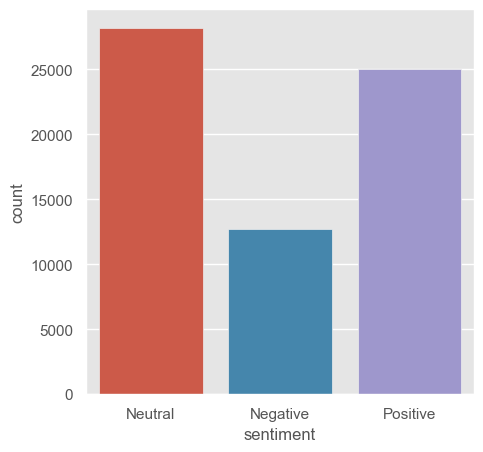

In [100]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

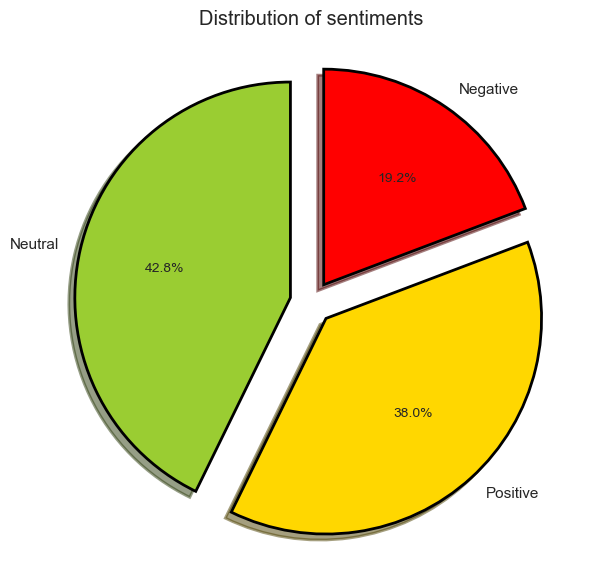

In [101]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [102]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()


text  polarity sentiment
24085  check virusshell awesome list github created s...       1.0  Positive
65228  best part virus bug almost everyone knows prog...       1.0  Positive
36448                    best meme year virusshell virus       1.0  Positive
14126          awesome research virusshell vulnerability       1.0  Positive
65271  suspect best way detect pass virus see trigger...       1.0  Positive

In [103]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

text      polarity  \
40115  virus popular java library logging error messa... -6.938894e-18   
54481  wondering whether hindsight virusshell conside... -6.938894e-18   
38942  vulnerability publicly disclosed last week une... -7.930164e-18   
74562  number popular services including apple icloud... -9.251859e-18   
71952  also known virusshell 0 day exploit virus popu... -9.251859e-18   

      sentiment  
40115  Negative  
54481  Negative  
38942  Negative  
74562  Negative  
71952  Negative

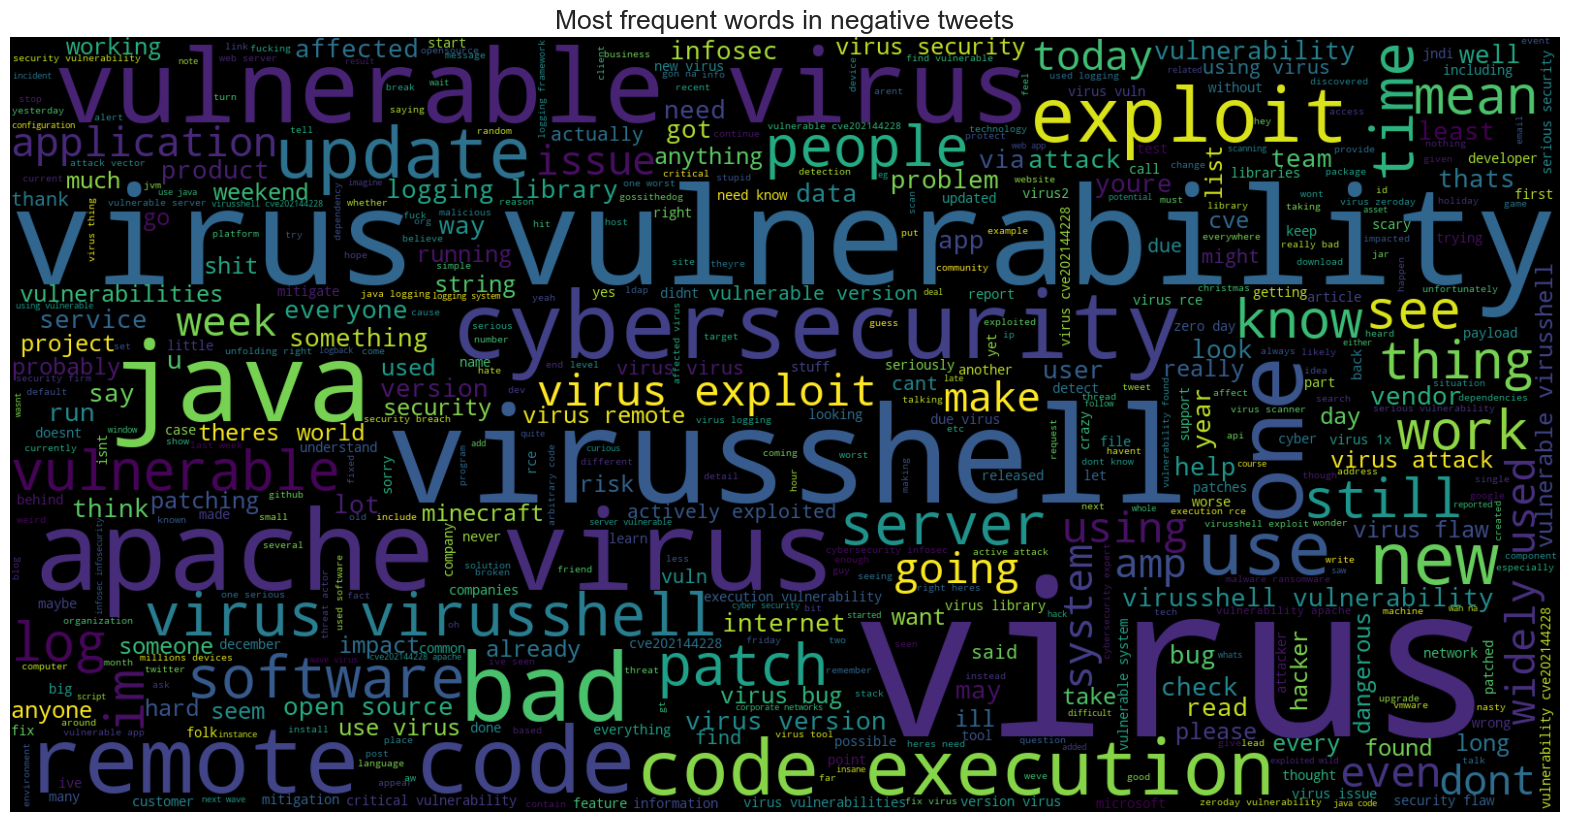

In [104]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [105]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [106]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 472434

First 20 features:
 ['00', '00 00', '00 tcp', '000', '000 cores', '000 hrs', '0000', '0000 get', '00000', '00000 reveal', '000000000000', '000000000000 main', '000000000000i', '000000000000i inhabitants', '0000000000kaiju', '0000000000kaiju excited', '0000001', '0000001 negligible', '000001', '000001 funds']


In [107]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [108]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [109]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (39592, 472434)
Size of y_train: (39592,)
Size of x_test: (26396, 472434)
Size of y_test: (26396,)


In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 91.96%


In [112]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 4091   596   375]
 [   83 11091   121]
 [  278   668  9093]]


              precision    recall  f1-score   support

    Negative       0.92      0.81      0.86      5062
     Neutral       0.90      0.98      0.94     11295
    Positive       0.95      0.91      0.93     10039

    accuracy                           0.92     26396
   macro avg       0.92      0.90      0.91     26396
weighted avg       0.92      0.92      0.92     26396



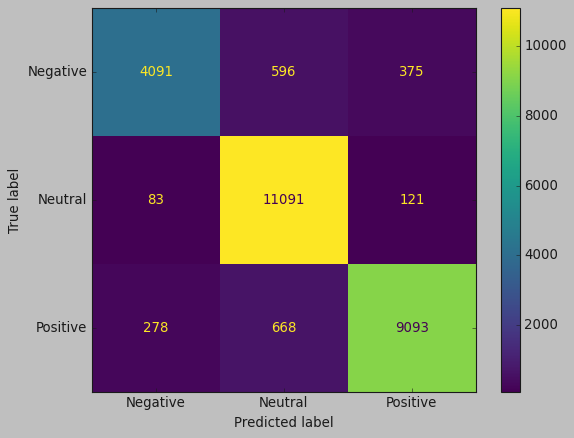

In [113]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

# Naive Bayes

training accuracy Score    :  0.9713073348151141
Validdation accuracy Score :  0.7543188361873011


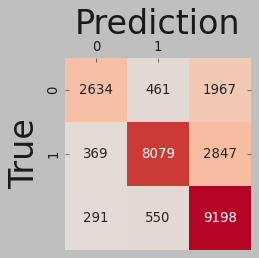

In [114]:
from sklearn.naive_bayes import MultinomialNB

baseline_clf = MultinomialNB()
baseline_clf.fit(x_train,y_train)

baseline_prediction = baseline_clf.predict(x_test)
baseline_accuracy = accuracy_score(y_test,baseline_prediction)
print("training accuracy Score    : ",baseline_clf.score(x_train,y_train))
print("Validdation accuracy Score : ",baseline_accuracy )

plt.figure(figsize = (3,3))
class_label = [0,1]
fig = sns.heatmap(confusion_matrix(y_test,baseline_prediction),cmap= "coolwarm",annot=True,vmin=0,cbar = False,
            center = True,xticklabels=class_label,yticklabels=class_label, fmt='d' )
fig.set_xlabel("Prediction",fontsize=30)
fig.xaxis.set_label_position('top')
fig.set_ylabel("True",fontsize=30)
fig.xaxis.tick_top()

# Linear Model (SGD Classifier)

training accuracy Score    :  0.9988886643766417
Validdation accuracy Score :  0.9319215032580694


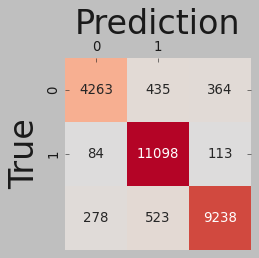

In [115]:
from sklearn.linear_model import SGDClassifier
linear_model_sgd = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)
linear_model_sgd.fit(x_train,y_train)

linear_model_sgd_prediction = linear_model_sgd.predict(x_test)
linear_model_sgd_accuracy = accuracy_score(y_test,linear_model_sgd_prediction)
print("training accuracy Score    : ",linear_model_sgd.score(x_train,y_train))
print("Validdation accuracy Score : ",linear_model_sgd_accuracy )

plt.figure(figsize = (3,3))
class_label = [0,1]
fig = sns.heatmap(confusion_matrix(y_test,linear_model_sgd_prediction),cmap= "coolwarm",annot=True,vmin=0,cbar = False,
            center = True,xticklabels=class_label,yticklabels=class_label, fmt='d' )
fig.set_xlabel("Prediction",fontsize=30)
fig.xaxis.set_label_position('top')
fig.set_ylabel("True",fontsize=30)
fig.xaxis.tick_top()

# Decision Tree

training accuracy Score    :  0.5086128510810265
Validdation accuracy Score :  0.5080315199272617


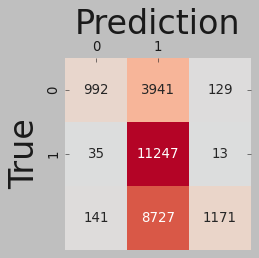

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(x_train,y_train)

decision_tree_prediction = decision_tree.predict(x_test)
decision_tree_accuracy = accuracy_score(y_test,decision_tree_prediction)
print("training accuracy Score    : ",decision_tree.score(x_train,y_train))
print("Validdation accuracy Score : ",decision_tree_accuracy )

plt.figure(figsize = (3,3))
class_label = [0,1]
fig = sns.heatmap(confusion_matrix(y_test,decision_tree_prediction),cmap= "coolwarm",annot=True,vmin=0,cbar = False,
            center = True,xticklabels=class_label,yticklabels=class_label, fmt='d' )
fig.set_xlabel("Prediction",fontsize=30)
fig.xaxis.set_label_position('top')
fig.set_ylabel("True",fontsize=30)
fig.xaxis.tick_top()

# Random Forest

training accuracy Score    :  1.0
Validdation accuracy Score :  0.8744127898166388


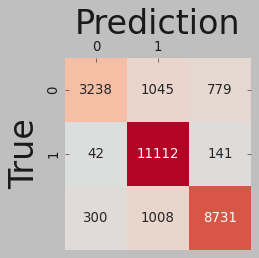

In [117]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(x_train, y_train)

rfc_prediction = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc_prediction)
print("training accuracy Score    : ",rfc.score(x_train,y_train))
print("Validdation accuracy Score : ",rfc_accuracy )

plt.figure(figsize = (3,3))
class_label = [0,1]
fig = sns.heatmap(confusion_matrix(y_test,rfc_prediction),cmap= "coolwarm",annot=True,vmin=0,cbar = False,
            center = True,xticklabels=class_label,yticklabels=class_label, fmt='d' )
fig.set_xlabel("Prediction",fontsize=30)
fig.xaxis.set_label_position('top')
fig.set_ylabel("True",fontsize=30)
fig.xaxis.tick_top()

# CNN

training accuracy Score    :  0.9996716508385532
Validdation accuracy Score :  0.9109713592968631


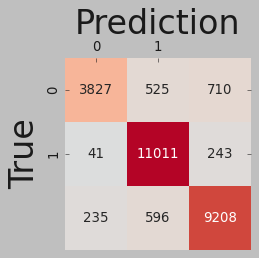

In [118]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_train, y_train)

clf_prediction = clf.predict(x_test)
clf_accuracy = accuracy_score(y_test,clf_prediction)
print("training accuracy Score    : ",clf.score(x_train,y_train))
print("Validdation accuracy Score : ",clf_accuracy )

plt.figure(figsize = (3,3))
class_label = [0,1]
fig = sns.heatmap(confusion_matrix(y_test,clf_prediction),cmap= "coolwarm",annot=True,vmin=0,cbar = False,
            center = True,xticklabels=class_label,yticklabels=class_label, fmt='d' )
fig.set_xlabel("Prediction",fontsize=30)
fig.xaxis.set_label_position('top')
fig.set_ylabel("True",fontsize=30)
fig.xaxis.tick_top()

# Ensemble

training accuracy Score    :  0.5083097595473833
Validdation accuracy Score :  0.48836944991665404


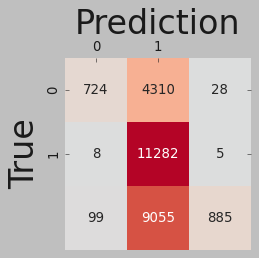

In [119]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
bagging.fit(x_train, y_train)

bagging_prediction = bagging.predict(x_test)
bagging_accuracy = accuracy_score(y_test,bagging_prediction)
print("training accuracy Score    : ",bagging.score(x_train,y_train))
print("Validdation accuracy Score : ",bagging_accuracy )

plt.figure(figsize = (3,3))
class_label = [0,1]
fig = sns.heatmap(confusion_matrix(y_test,bagging_prediction),cmap= "coolwarm",annot=True,vmin=0,cbar = False,
            center = True,xticklabels=class_label,yticklabels=class_label, fmt='d' )
fig.set_xlabel("Prediction",fontsize=30)
fig.xaxis.set_label_position('top')
fig.set_ylabel("True",fontsize=30)
fig.xaxis.tick_top()

# Comparison of Various Classifiers

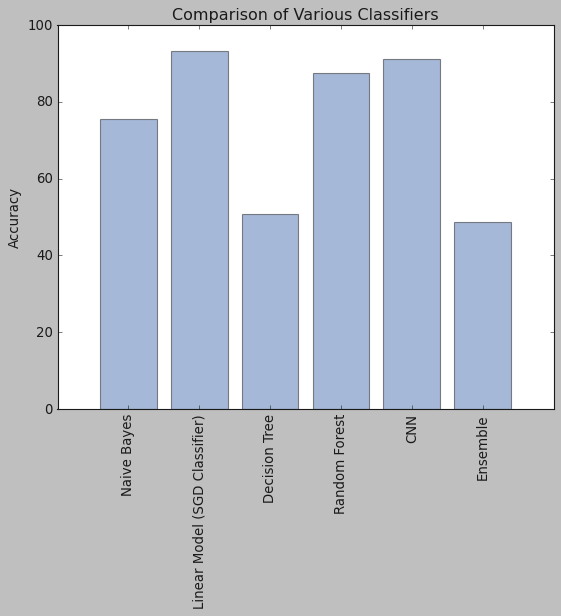

In [120]:
classifiers = ['Naive Bayes', "Linear Model (SGD Classifier)", 'Decision Tree', 'Random Forest', 'CNN', 'Ensemble']
accuracies = [75.43, 93.19, 50.80, 87.44,91.05, 48.63]
plt.figure(4, [8,6])
plt.bar(range(len(classifiers)), accuracies, align='center', alpha=0.5)
plt.xticks(range(len(classifiers)), classifiers, rotation=90)
plt.ylabel('Accuracy')
plt.title('Comparison of Various Classifiers')
plt.ylim([0, 100])
plt.show()

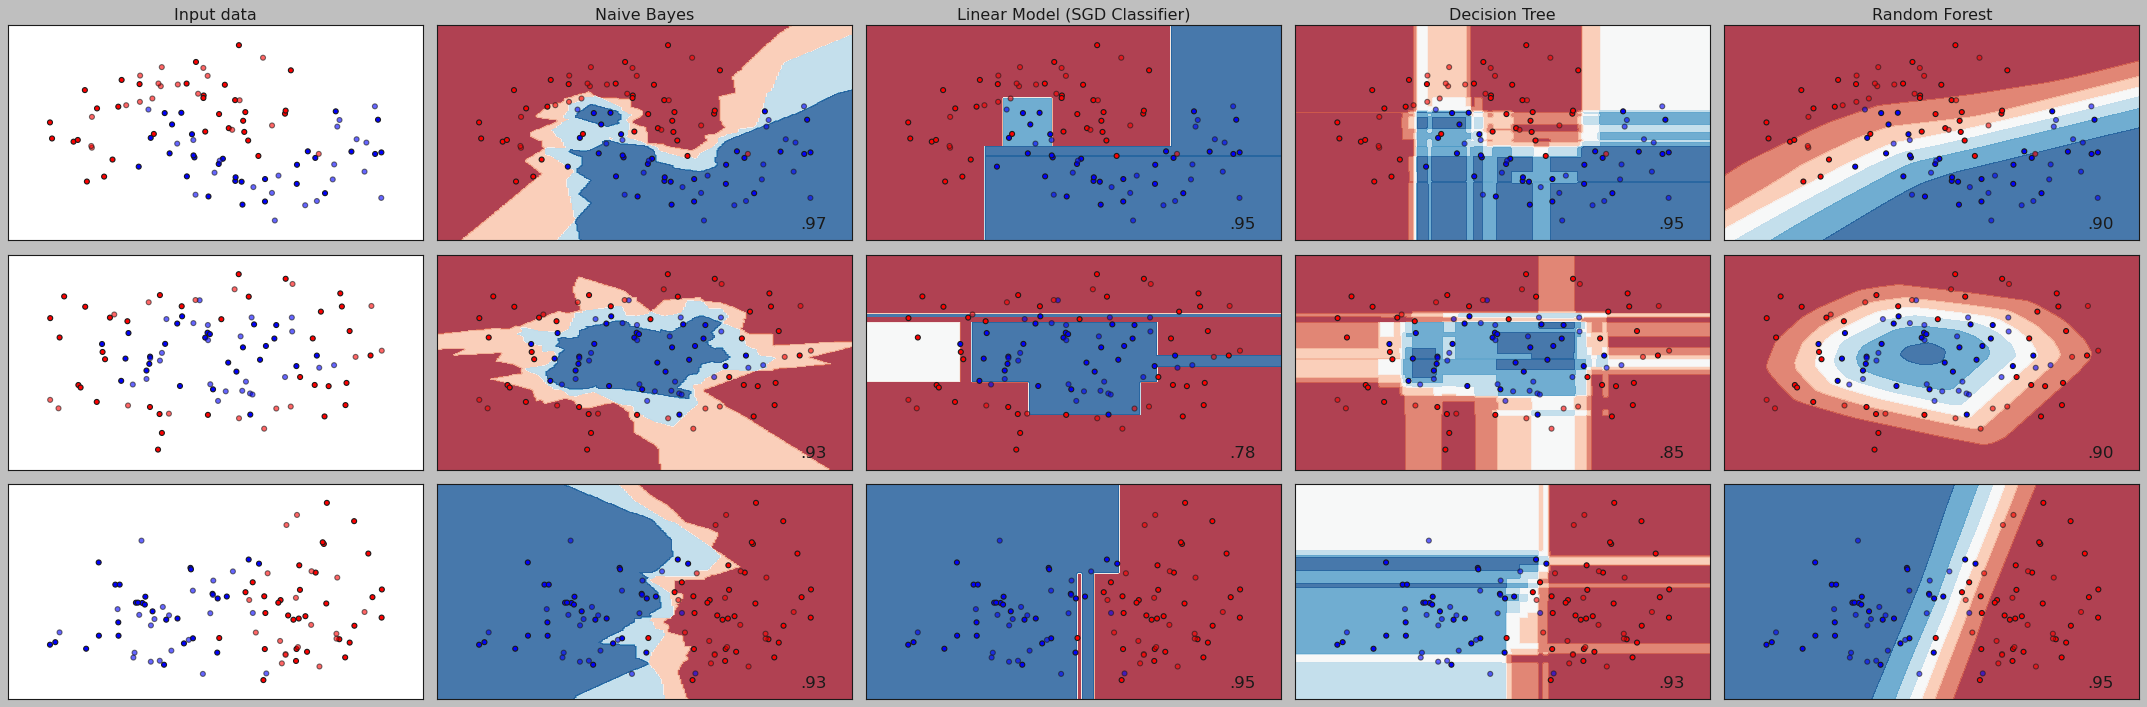

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap

h = .02  # set grid interval

# Classificators chosen for comparison
names = ['Naive Bayes', "Linear Model (SGD Classifier)", 'Decision Tree', 'Random Forest', 'CNN', 'Ensemble']

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
]

# Let's generate 3 datasets with 2 features
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y) # linearly seperable data (with some noise)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over all datasets
for ds_cnt, ds in enumerate(datasets):
    # scale and split data into train and test sets стандартизируем и разделим на обучающую и тестовую выборки
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # visualize generated data
    cm = plt.cm.RdBu # choose color palette выбираем цветовую палитру
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plot train dataset
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # plot test dataset (dim dots on the plot)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over all classificators
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train) # train classificators обучим классификатор
        score = clf.score(X_test, y_test)

        # Plot decision boundary. To do this, assign each point on the grid 
        # a color corresponding to the probability of belonging to classes.
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot points of train data
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # The same for test data
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

Thank you. End of this Notebook